# Exercise 1-3. Load the Yale B image database and compute the economy SVD using a standard svd command. Now compute the SVD with the method of snapshots. Compare the singular value spectra on a log plot. Compare the first 10 left singular vectors using each method (remember to reshape them into the shape of a face). Now compare a few singular vectors farther down the spec- trum. Explain your findings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
plt.rcParams['figure.figsize'] = [16,8]

In [3]:
dataset = fetch_olivetti_faces()
faces = dataset.data
faces.shape

(400, 4096)

(-0.5, 63.5, 63.5, -0.5)

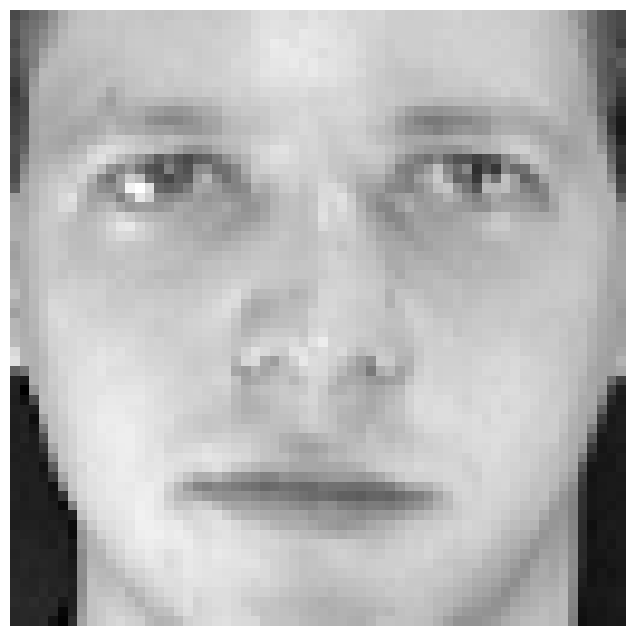

In [4]:
face = faces[0]
plt.imshow(face.reshape((64,64)), cmap='gray')
plt.axis('off')

In [5]:
U, s, Vt = np.linalg.svd(faces, full_matrices=False)

In [6]:
snapshots = np.random.choice(faces.shape[0], size=100, replace=False)
U_snapshot, s_snapshot, Vt_snapshot = np.linalg.svd(faces[snapshots], full_matrices=False)

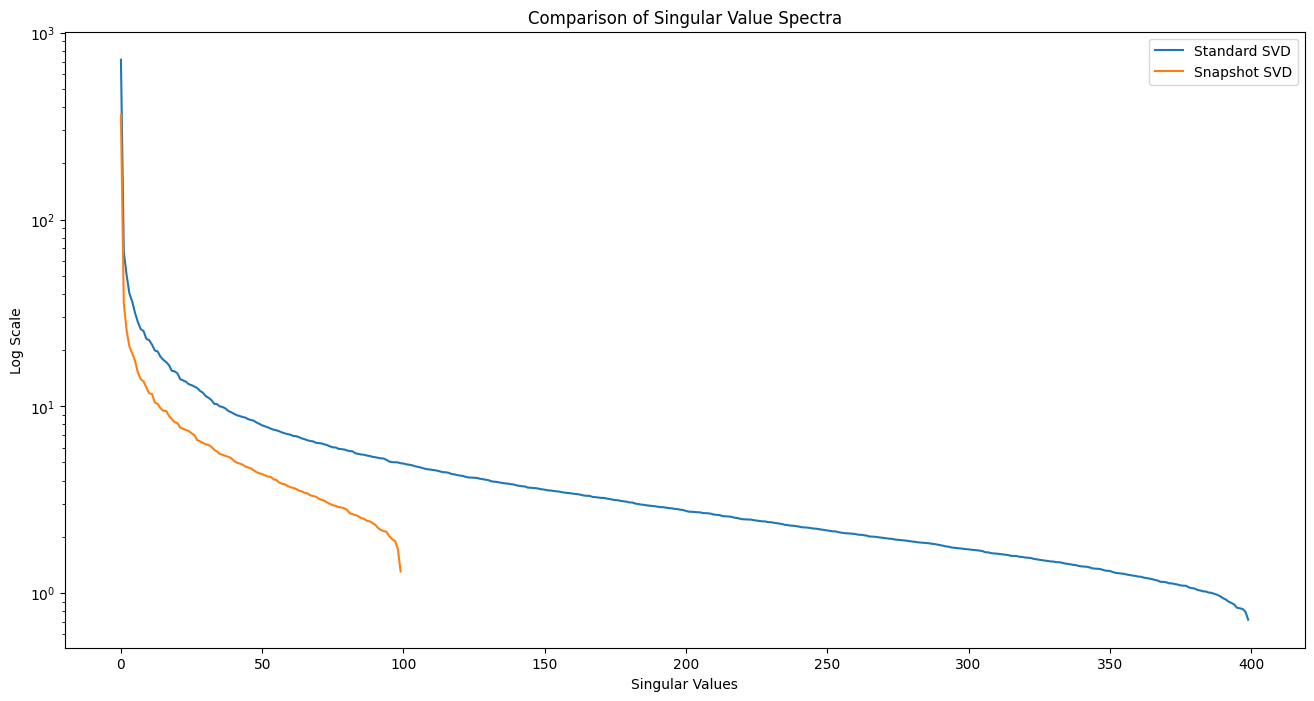

In [7]:
plt.plot(s, label='Standard SVD')
plt.plot(s_snapshot, label='Snapshot SVD')
plt.yscale('log')
plt.xlabel('Singular Values')
plt.ylabel('Log Scale')
plt.title('Comparison of Singular Value Spectra')
plt.legend()
plt.show()

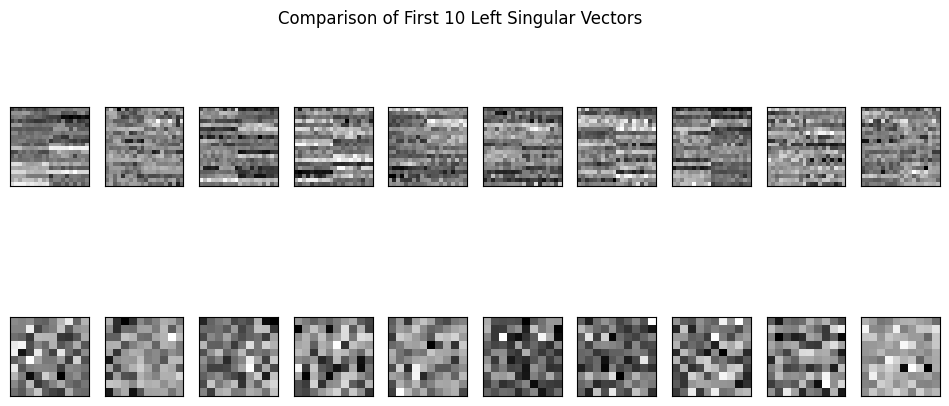

In [8]:
num_faces = 10
plt.figure(figsize=(12, 5))
for i in range(num_faces):
    # Reshape and display the face matrix using standard SVD
    plt.subplot(2, num_faces, i+1)
    plt.imshow(U[:, i].reshape((20, 20)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    # Reshape and display the face matrix using snapshot SVD
    plt.subplot(2, num_faces, num_faces + i + 1)
    plt.imshow(U_snapshot[:, i].reshape((10, 10)), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Comparison of First 10 Left Singular Vectors')
plt.show()


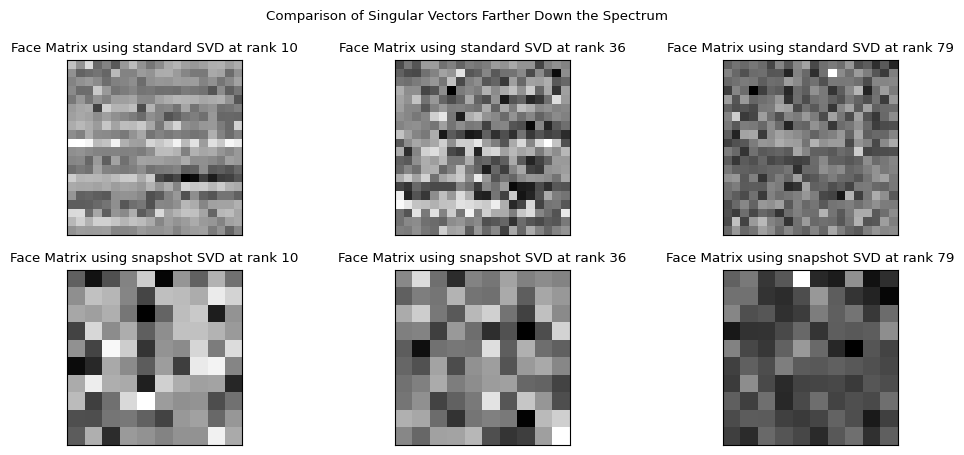

In [21]:
num_faces = 3
indices = [10, 36, 79]  # Example indices of singular vectors to compare

plt.figure(figsize=(12, 5))
for i in range(num_faces):
    # Reshape and display the face matrix using standard SVD
    plt.subplot(2, num_faces, i+1)
    plt.imshow(U[:, indices[i]].reshape((20, 20)), cmap='gray')
    x = indices[i]
    plt.rcParams['font.size'] = 8
    plt.title(f'Face Matrix using standard SVD at rank {x}')
    plt.xticks([])
    plt.yticks([])

    # Reshape and display the face matrix using snapshot SVD
    plt.subplot(2, num_faces, num_faces + i + 1)
    plt.imshow(U_snapshot[:, indices[i]].reshape((10, 10)), cmap='gray')
    plt.title(f'Face Matrix using snapshot SVD at rank {x}')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Comparison of Singular Vectors Farther Down the Spectrum')
plt.show()